Анализ сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.
Описание данных

Пользователи — users_go.csv

user_id — уникальный идентификатор пользователя
name — имя пользователя
age — возраст
city — город
subscription_type — тип подписки (free, ultra)
Поeздки — rides_go.csv

user_id — уникальный идентификатор пользователя
distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date — дата совершения поездки
Подписки — subscriptions_go.csv

subscription_type — тип подписки
minute_price — стоимость одной минуты поездки по данной подписке
start_ride_price — стоимость начала поездки
subscription_fee — стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
users_go.info()
users_go.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [3]:
riders_go = pd.read_csv('/datasets/rides_go.csv')
riders_go.info()
riders_go.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [4]:
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
subscriptions_go.info()
subscriptions_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Вывод:

Загрузили и рассмотрели данные о пользователях, поездках и тарифах. Содержится информация о возрасте и городе пользователя, а также о длительности и протяженности поездок, дате поездки.

Существует два типа подписок - ultra и free. То есть бесплатная и платная. Содержится информация о стартовой цене

#### Шаг 2. Предобработка данных

In [5]:
riders_go['date'] = pd.to_datetime(riders_go['date'], format='%Y-%m-%dT%H:%M:%S')
riders_go.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [6]:
riders_go['month'] = riders_go['date'].dt.month
riders_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [7]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [8]:
riders_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [9]:
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [10]:
users_go.duplicated().sum()

31

In [11]:
users_go.drop_duplicates(inplace=True)

In [12]:
riders_go.duplicated().sum()

0

In [13]:
subscriptions_go.duplicated().sum()

0

Вывод: 
Добавлен столбец month с номер месяца

Пропущенных данных в таблицах нет

Обнаружены и удалены строки-дубликаты среди пользователей

#### Шаг 3. Исследовательский анализ данных

In [14]:
count_of_users_by_city = users_go['city'].value_counts()
count_of_users_by_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

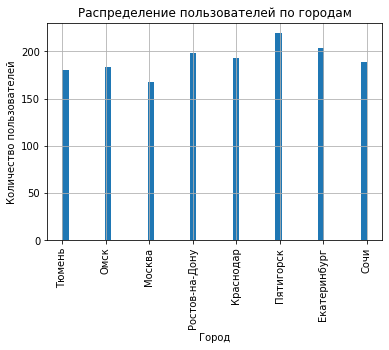

In [15]:
plt.hist(users_go['city'], bins = 50)
plt.title('Распределение пользователей по городам')
plt.xlabel('Город')
plt.xticks(rotation=90)
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

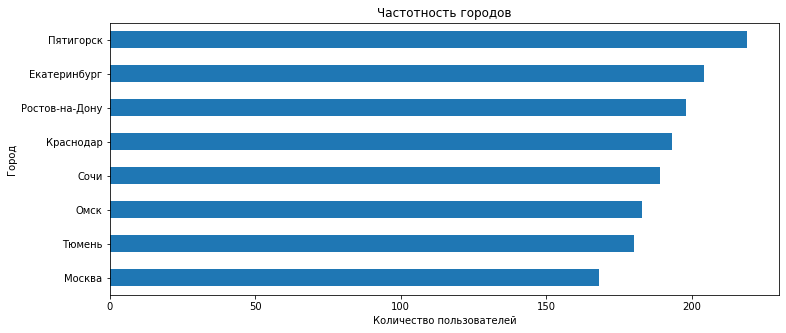

In [16]:
# Код ревьюера
plt.figure(figsize = (12, 5))
users_go['city'].value_counts(ascending = True).plot(
    kind = 'barh',
    title = 'Частотность городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.show()

Пользователи распределены примерно одинаково по всем городам. Больше всего пользователей в Пятигорске. Меньше всего в Москве

In [17]:
count_of_users_by_sub = users_go['subscription_type'].value_counts()
count_of_users_by_sub

free     835
ultra    699
Name: subscription_type, dtype: int64

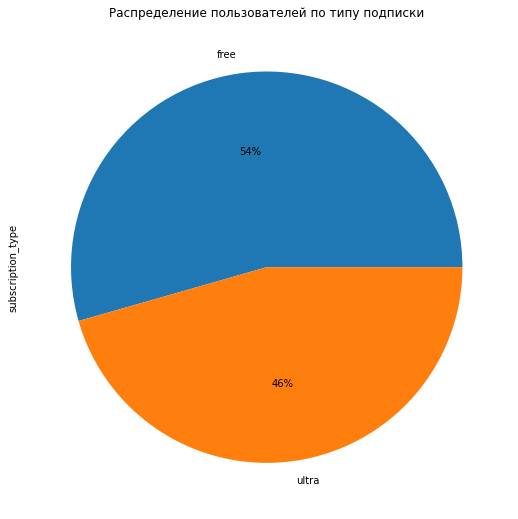

In [18]:
users_go['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_of_users_by_sub,
    autopct = '%1.0f%%',
    figsize=(9,9), 
    title = 'Распределение пользователей по типу подписки');

Пользователей на бесплатном тарифе оказалось больше, чем пользователей с подпиской

In [19]:
users_go['age'].value_counts()

25    145
24    132
26    131
23    129
27    119
22    119
28    112
21     93
20     71
30     68
29     68
31     48
19     47
18     46
32     41
33     39
17     26
34     19
16     19
35     15
15     13
14      9
13      8
36      6
12      4
38      3
37      2
39      1
43      1
Name: age, dtype: int64

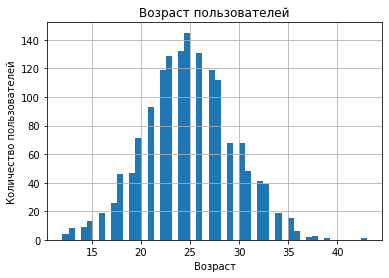

In [20]:
plt.hist(users_go['age'], bins = 50)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

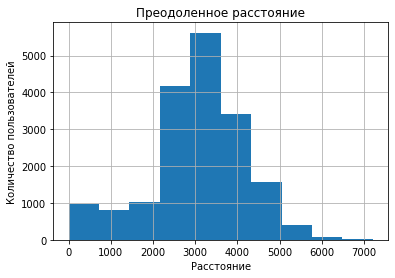

In [21]:
riders_go
plt.hist(riders_go['distance'], bins = 10)
plt.title('Преодоленное расстояние')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

В основном, дистанция находится в промежутке от 2500 до 4000 м. Но есть и пройденные расстояния до 6,5 км

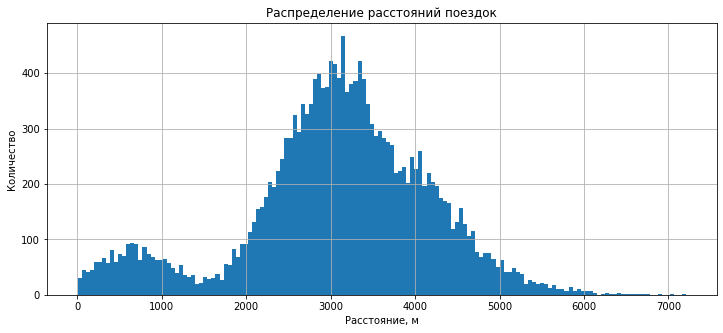

In [22]:
# Код ревьюера
riders_go['distance'].hist(bins = 150, figsize = (12, 5))
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество')
plt.show()

In [23]:
#Самые короткие поездки
riders_go['distance'].sort_values().head(10)

11555     0.855683
9541      2.570787
13690     4.329506
8658      6.784447
7841      7.097072
8906     11.283615
8324     12.233115
13940    15.000606
15626    15.366168
11862    15.630873
Name: distance, dtype: float64

In [24]:
#Самые длинные поездки
riders_go['distance'].sort_values(ascending=False).head(10)

16309    7211.007745
16484    7066.003772
15580    6908.491343
17171    6760.940067
17242    6724.932981
10341    6671.969833
11385    6601.197575
12086    6538.937375
10915    6535.386520
11319    6503.600402
Name: distance, dtype: float64

In [25]:
riders_go['duration'].sort_values().head(10)

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
15015    0.5
13012    0.5
7508     0.5
16589    0.5
9049     0.5
Name: duration, dtype: float64

In [26]:
riders_go['duration'].sort_values(ascending=False).head(10)

4215    40.823963
4709    39.873856
2623    39.526602
1998    38.352763
6453    38.265229
143     38.125729
3729    37.014141
499     36.906491
6348    36.809310
4653    36.622595
Name: duration, dtype: float64

In [27]:
# Общее время поездок и дистанция для каждого пользователя:
riders_go.groupby(['user_id']).sum(numeric_only = True)

,distance,duration,month
user_id,,,
1,34070.182066,204.604909,99
2,33964.058614,197.644279,67
3,36907.597866,233.193513,66
4,44837.189916,288.563581,107
5,35556.949649,174.073932,51
...,...,...,...
1530,46758.469822,292.366839,104
1531,67054.794222,408.192206,142
1532,33902.203192,212.160144,111


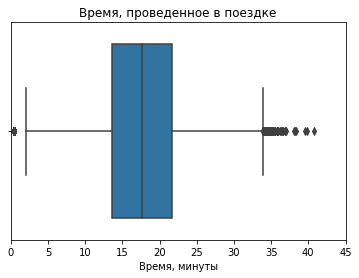

In [28]:
sns.boxplot(x = riders_go['duration'])
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
_ = plt.xlim(0, 45)

Вывод:
Частота встречаемости городов
Примерно одинаковое распределение пользователей по городам. Лидером по кол-ву пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168 пользователей. Возможно это связано с тем, что в маленьком городе небольшие расстояния, для которых отлично подходит самокат. 

Соотношение пользователей с подпиской и без подписки

Пользователей, использующих бесплатную подписку - 835 человек - примерно 54% от общего кол-ва пользователей. 
Пользователей, использующих платную подписку больше - 699 человек - ~46%
Пользователей, использующих бесплатную подписку больше, чем пользователей, использующих платную подписку.

Возраст пользователей

Возраст пользователей начинается с 12 лет и заканчивается возрастом 43 года.
Больше всего пользователей в возрасте от 20 до 30 лет.

Расстояние, которое пользователь преодолел за одну поездку

Самая короткая дистанция - 0.86 км
Самая длинная дистанция - 7.2 км
В основном пользователи проезжают от 2.5 км до 4 км.

Продолжительность поездок

Самые короткие поездки - 0.5 минуты. Скорее всего, пользователь просто передумал брать самокат или самокат неисправен.
Самая длинная поездка - 40 минут.
В основном длительность поездки около 13 - 22 минут.

#### Шаг 4. Объединение данных

In [29]:
riders_go['duration'] = np.ceil(riders_go['duration']) 

In [30]:
full_data = users_go.merge(riders_go)
full_data = full_data.merge(subscriptions_go)
full_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [31]:
full_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [32]:
free_subscription = full_data.query("`subscription_type` == 'free'")
free_subscription

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


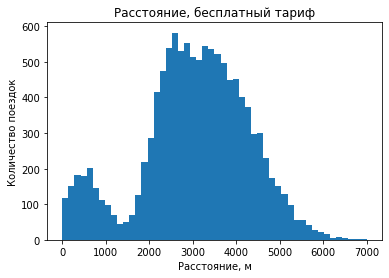

<Figure size 1440x1440 with 0 Axes>

In [33]:
plt.hist(free_subscription['distance'], bins=50, range = (0, 7000))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Расстояние в основном находится в промежутке от 2 до 4 км

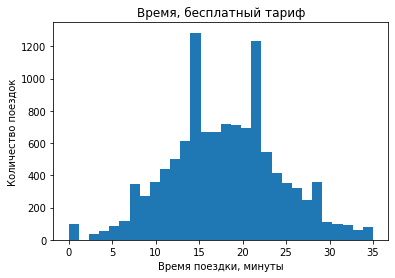

<Figure size 1440x1440 with 0 Axes>

In [34]:
plt.hist(free_subscription['duration'], bins=30, range = (0, 35))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Время в основном примерно находится в промежутке от 10 до 25 минут

In [35]:
ultra_subscription = full_data.query("`subscription_type` == 'ultra'")
ultra_subscription

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,25.0,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,16.0,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,15.0,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,16.0,2021-10-17,10,6,0,199


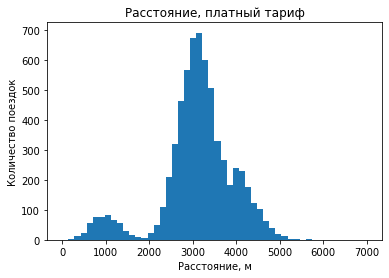

<Figure size 1440x1440 with 0 Axes>

In [36]:
plt.hist(ultra_subscription['distance'], bins=50, range = (0, 7000))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Расстояние в основном находится в промежутке от 2 до 4 км. Пик около 3 км

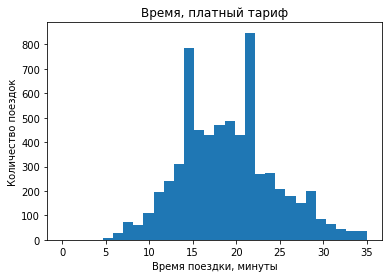

<Figure size 1440x1440 with 0 Axes>

In [37]:
plt.hist(ultra_subscription['duration'], bins=30, range = (0, 35))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

Время в основном примерно находится в промежутке от 15 до 25 минут

Вывод
Объединили данные о пользователях, поездках и тарифах в один датафрейм - full_data.

Было создано два отдельных датафрейма:

free_subscription - информация о пользователях с бесплатным тарифом
ultra_subscription - информация о пользователях с платным тарифом

Пользователи с бесплатным тарифом проезжают в среднем от 2 до 5 км, но расстояние может дохоить до 6-6,5 км. Время поездки в основном от 10 до 30 минут.

Поездки для пользователей с платным тарифом в среднем длятся от 15 до 25 минут. В среднем проезжают около 3 км

Исходя из данных, можно сделать вывод пользователи с бесплатным тарифом совершают более более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

#### Шаг 5. Подсчёт выручки

In [38]:
total_data = pd.pivot_table(full_data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

In [39]:
#total_data['duration'] = np.ceil(total_data['duration'])

In [40]:
total_data.sort_values(by='month').head(20)

distance  duration  name subscription_type
month user_id                                                
1     1         7027.511294      42.0     2             ultra
      1061     12637.249630      43.0     3              free
      1063      3276.362299      10.0     1              free
      1064      5297.324649      15.0     1              free
      1065     14547.099333      99.0     4              free
      1066      2809.064949      19.0     1              free
      1067      3864.900780      22.0     1              free
      1069      7007.076943      53.0     3              free
      1071      3635.094136      15.0     1              free
      1072      2498.615999      11.0     1              free
      1073      2945.802455      16.0     1              free
      1074      2814.793386      22.0     1              free
      1075      5746.745124      29.0     3              free
      1077       114.036199      13.0     1              free
      1078      3748.219563      19.0     1              free
      1082      7250.124895      30.0     2              free
      1083      5848.881463      31.0     2              free
      1084      4615.097141      25.0     1              free
      1085     11410.546346      63.0     3              free
      1086      4044.280322      18.0     1              free

In [41]:
total_data.query('user_id == 1')

,,distance,duration,name,subscription_type
month,user_id,,,,
1,1,7027.511294,42.0,2,ultra
4,1,754.159807,7.0,1,ultra
8,1,6723.470560,46.0,2,ultra
10,1,5809.911100,32.0,2,ultra
11,1,7003.499363,56.0,3,ultra
12,1,6751.629942,28.0,2,ultra


Добавим столбец с помесячной выручкой

In [42]:
def income(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['name']
    else:
        return 'Другая подписка'

In [43]:
total_data['income_per_month'] = total_data.apply(income, axis=1)

In [44]:
total_data['income_per_month'].head(20)

month  user_id
1      1          451.0
       3          277.0
       5          277.0
       7          367.0
       12         397.0
       13         451.0
       14         409.0
       15         433.0
       20         373.0
       22         277.0
       25         301.0
       26         367.0
       30         349.0
       32         349.0
       35         541.0
       42         337.0
       43         487.0
       44         313.0
       45         361.0
       46         319.0
Name: income_per_month, dtype: float64

In [45]:
total_data.query('user_id == 1')

,,distance,duration,name,subscription_type,income_per_month
month,user_id,,,,,
1,1,7027.511294,42.0,2,ultra,451.0
4,1,754.159807,7.0,1,ultra,241.0
8,1,6723.470560,46.0,2,ultra,475.0
10,1,5809.911100,32.0,2,ultra,391.0
11,1,7003.499363,56.0,3,ultra,535.0
12,1,6751.629942,28.0,2,ultra,367.0


In [46]:

total_data.groupby('subscription_type')['income_per_month'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: income_per_month, dtype: float64

Вывод:

Создали новый датафрейм с агрегированными данными (total_data) на основе датафрейма с объединенными данными (full_data).

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. 
Добавили столбец с помесячной выручкой для каждого пользователя

#### Шаг 6. Проверка гипотез

6.1 Проверим гипотезу, что пользователи с подпиской тратят в среднем больше времени на поездки, чем пользователи на бесплатной тарифе

H0: Время пользователей на подписке ultra = время пользователей на подписке free

H1: Время пользователей на подписке ultra > время пользователей на подписке free

alpha = 0.05 - уровень статистической значимости

In [47]:
ultra = ultra_subscription['duration'] 

free = free_subscription['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


Вывод:

Проверили и отвергли гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free

6.2 Гипотеза - пользователи с подпиской проезжают расстояние, превышающее 3130 метров за одну поездку.

H0: Расстояние пользователей на подписке ultra = 3130 метров

H1: Расстояние пользователей на подписке ultra > 3130 метров

In [48]:
ultra_dist = ultra_subscription['distance']

interested_value = 3130

alpha = 0.05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


Вывод:

Мы не можем утверждать, что пользователи с подпиской проезжают расстояние меньшее, чем расстояние, приводящее к износу самоката.

6.3. Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

H0: Выручка пользователей на подписке ultra = выручка пользователей на подписке free

H1: Выручка пользователей на подписке ultra > выручка пользователей на подписке free

In [49]:
ultra_per_month = total_data.loc[total_data.subscription_type == 'ultra', 'income_per_month'] 

free_per_month = total_data.loc[total_data.subscription_type == 'free', 'income_per_month'] 

results = st.ttest_ind(ultra_per_month, 
                       free_per_month,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Вывод:

Проверили гипотезу - можно утверждать, что на пользователях с подпиской ultra выручка больше, чем выручка с пользователей на подписке free

6.4. Снизилось ли кол-во обращений в техподдержку. Используем для проверки гипотезу о равенстве средних для зависимых (парных) выборок.

μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

H0 : μ1 = μ2
H1 : μ1 != μ2

Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

Общий вывод:
Загружены данные о пользователях, информации о поездках и информации о подписках.

Осуществлена предобработка данных. Пропусков не обнаружено. Поменяли тип данных у столбца date из датафрейма riders_go  к типу даты pandas. Добавили столбец month  с номером месяца. Удалены дубликаты из датафрейма с пользователями.

Провели исследовательский анализ данных:

Определили, что количество пользователей по городам распределено примерно одинаково. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168 пользователей.
Пользователей с бесплатной подпиской - 835 человек - ~54% от общего числа пользователей. 
Пользователей с платной подпиской - 699 пользователей - ~46%. 
Возраст пользователей в основном находится в пределах от 20 до 30 лет.
В основном пользователи проезжают от 2.5 км до 4 км.
Чаще всего длительность поездки находится в промежутке от 13 до 22 минут

Объединили данные о пользователях, поездках и подписках в один датафрейм. Создали на его основе 2 датафрейма:

Для пользователей с платной подпиской
Для пользователей с бесплатной подпиской

Визуализировали информацию о расстоянии и времени поездки для пользователей каждого тарифа.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км. 
Для платного тарифа время поездки составляет от 15 до 25 минут. Пик расстояния около 3 км.
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм total_data. Добавили в датафрейм total_data столбец с помесячной выручкой income_per_month.

Проверили гипотезы:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе

Отвергли нулевую гипотезу

Пользователи с подпиской проезжают расстояние, превышающее 3130 метров за одну поездку

Не удалось отвергнуть нулевую гипотезу

Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

Отвергли нулевую гипотезу